In [ ]:
import pandas as pd
data=pd.read_csv("/content/mammographic.csv")
data


,BIRADS assessment,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [ ]:
data.columns = ["BIRADS", "Age", "Shape", "Margin", "Density", "Severity"]
print(str(data))

    BIRADS Age Shape Margin Density  Severity
0        5  67     3      5       3         1
1        4  43     1      1       ?         1
2        5  58     4      5       3         1
3        4  28     1      1       3         0
4        5  74     1      5       ?         1
..     ...  ..   ...    ...     ...       ...
956      4  47     2      1       3         0
957      4  56     4      5       3         1
958      4  64     4      5       3         0
959      5  66     4      5       3         1
960      4  62     3      3       3         0

[961 rows x 6 columns]


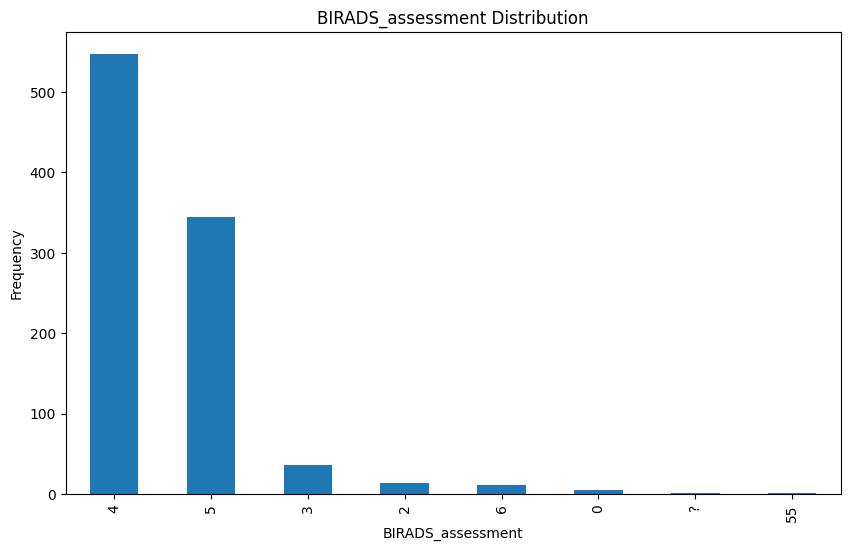

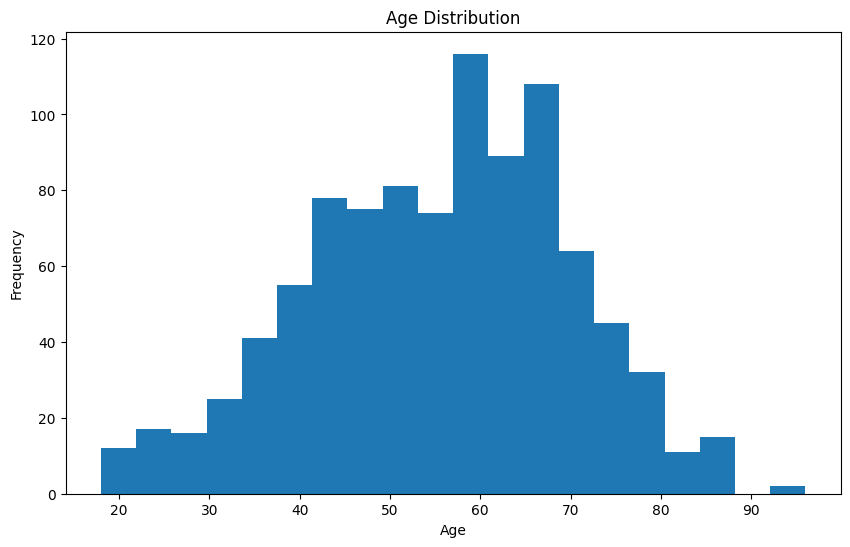

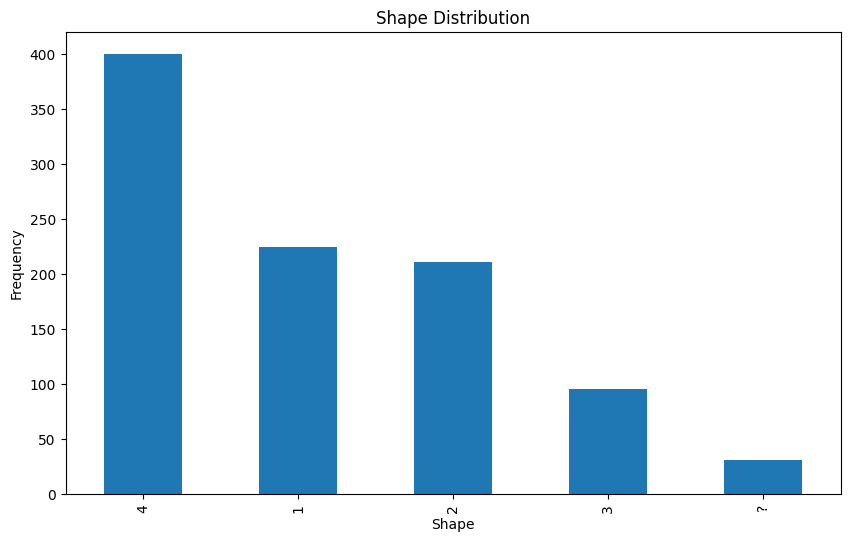

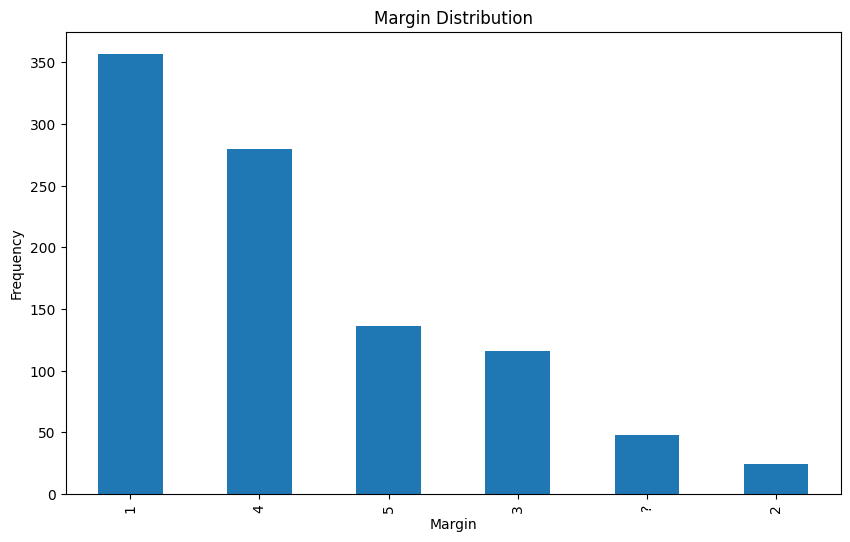

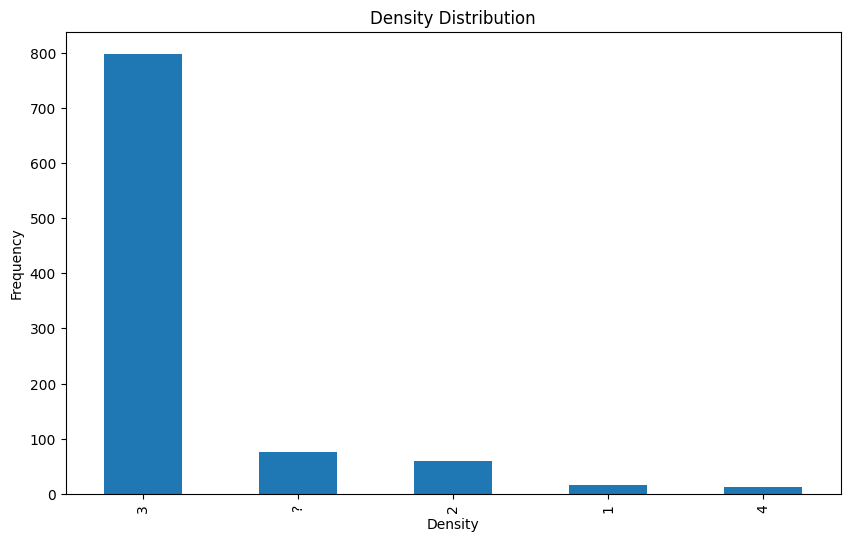

In [ ]:
import matplotlib.pyplot as plt
# Plot BIRADS assessment
plt.figure(figsize=(10, 6))
data['BIRADS'].value_counts().plot(kind='bar')
plt.title('BIRADS_assessment Distribution')
plt.xlabel('BIRADS_assessment')
plt.ylabel('Frequency')
plt.show()

# Histogram of Age
plt.figure(figsize=(10, 6))
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')  # Convert Age to numeric, coercing errors
plt.hist(data['Age'].dropna(), bins=20)  # Drop NaN values for the histogram
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# For other attributes (Shape, Margin, Density), let's assume you want to visualize their distributions
attributes = ['Shape', 'Margin', 'Density']
for attribute in attributes:
    plt.figure(figsize=(10, 6))
    data[attribute].value_counts().plot(kind='bar')
    plt.title(f'{attribute} Distribution')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.show()

# Convert 'Age' and 'Severity' to string (character in R terms)
data['Age'] = data['Age'].astype(str)
data['Severity'] = data['Severity'].astype(str)

In [ ]:


# Convert the "BIRADS" column to string
data["BIRADS"] = data["BIRADS"].astype(str)

# Replace "55" with "5" in the "BIRADS" column
data["BIRADS"] = data["BIRADS"].replace("55", "5")

# Replace "0" with "1" in the "BIRADS" column
data["BIRADS"] = data["BIRADS"].replace("0", "1")

# Replace "?" and "6" with "4" in the "BIRADS" column
data["BIRADS"] = data["BIRADS"].replace(["?", "6"], "4")

# Convert the "BIRADS" column to a categorical type
data["BIRADS"] = data["BIRADS"].astype('category')

# Checking the structure using info() to mimic str() from R
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   BIRADS    961 non-null    category
 1   Age       961 non-null    object  
 2   Shape     961 non-null    object  
 3   Margin    961 non-null    object  
 4   Density   961 non-null    object  
 5   Severity  961 non-null    object  
dtypes: category(1), object(5)
memory usage: 38.8+ KB
None


In [ ]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Calculate the mean of the "Age" column, excluding NaN values
mean_age = data['Age'].mean()

# Replace NaN values in the "Age" column with the calculated mean
data['Age'].fillna(mean_age, inplace=True)

# If you need to convert the "Age" column back to integers (optional, depending on your requirements)
data['Age'] = data['Age'].astype(int)

# Display the modified DataFrame or check the operation's success
print(data.head())

  BIRADS  Age Shape Margin Density Severity
0      5   67     3      5       3        1
1      4   43     1      1       ?        1
2      5   58     4      5       3        1
3      4   28     1      1       3        0
4      5   74     1      5       ?        1


In [ ]:
# Convert the "Age" column to numeric, coercing errors to NaN (which handles the "?" entries)
data["Age"] = pd.to_numeric(data["Age"], errors='coerce')

# Calculate the mean of the "Age" column, excluding NaN values
mean_age = data["Age"].mean()

# Fill NaN values in the "Age" column with the calculated mean
data["Age"].fillna(mean_age, inplace=True)

# Ensure "Age" is of numeric type after replacement (this step may be somewhat redundant as it's already numeric)
data["Age"] = pd.to_numeric(data["Age"])

# Convert the "shape" column to string type first to ensure all operations on text are supported
data["Shape"] = data["Shape"].astype(str)

# Replace "?" with "4" in the "shape" column
data["Shape"] = data["Shape"].replace("?", "4")

# Convert the "shape" column to a categorical type
data["Shape"] = data["Shape"].astype('category')

In [ ]:
# Convert the "Margin" column to string type to handle "?" replacements
data["Margin"] = data["Margin"].astype(str)

# Replace "?" with "1" in the "Margin" column
data["Margin"] = data["Margin"].replace("?", "1")

# Convert the "Margin" column to a categorical type
data["Margin"] = data["Margin"].astype('category')

In [ ]:
# Convert the "Density" column to string type first to ensure all operations on text are supported
data["Density"] = data["Density"].astype(str)

# Replace "?" with "3" in the "Density" column
data["Density"] = data["Density"].replace("?", "3")

# Convert the "Density" column to a categorical type
data["Density"] = data["Density"].astype('category')

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and it's already loaded

# Your target variable 'Severity' needs to be separated from the predictors.
# Let's assume all other columns are predictors, but adjust as necessary.
X = data.drop('Severity', axis=1)  # This removes the 'Severity' column and keeps the rest as features.
y = data['Severity']  # This is the target variable.

# Split the data into training and testing sets.
# test_size=0.3 means that 30% of the data will be used for testing, and 70% for training, which matches your splitRatio of 0.7.
# random_state is set to a fixed number for reproducibility of your results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# If you need to combine X_train and y_train back into a single DataFrame, you can do so. Same for X_test and y_test.
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Now 'train' holds your training data and 'test' holds your testing data.

<ipython-input-10-78756e70e29b>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(data['Age'], data['BIRADS'], c=data['Severity'], cmap='viridis')


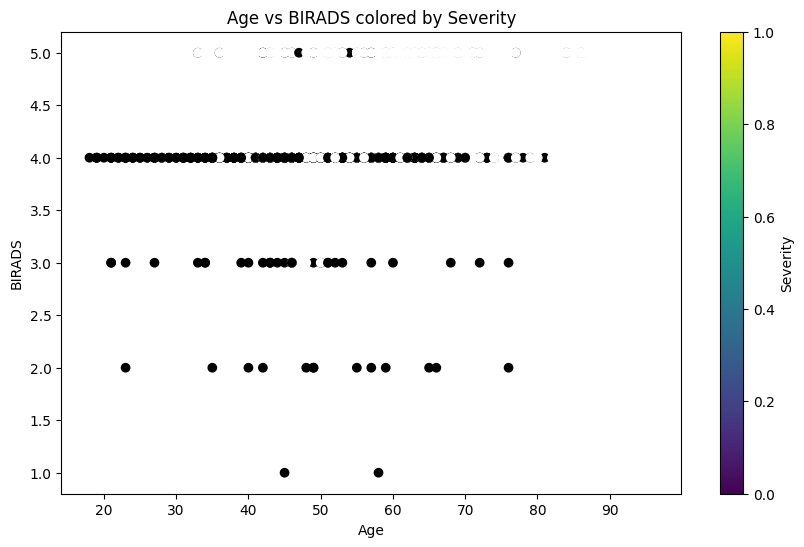

In [ ]:
# Convert 'BIRADS' column to integer
data['BIRADS'] = pd.to_numeric(data['BIRADS'], errors='coerce').astype('Int64')

# Plot Age vs BIRADS, coloring by Severity
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Age'], data['BIRADS'], c=data['Severity'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('BIRADS')
plt.title('Age vs BIRADS colored by Severity')
plt.colorbar(scatter, label='Severity')
plt.show()

<ipython-input-11-a8527c79e138>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Age'], data['Density'], c=data['Severity'], cmap='viridis')


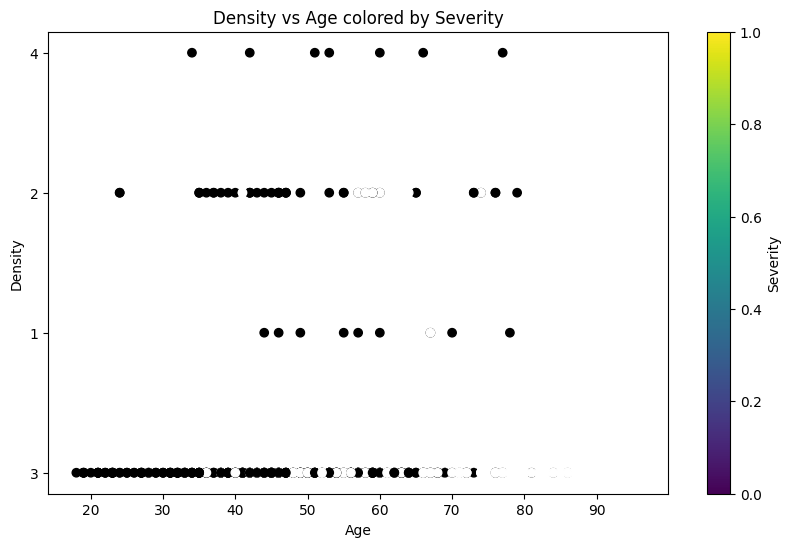

<ipython-input-11-a8527c79e138>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Age'], data['Margin'], c=data['Severity'], cmap='viridis')


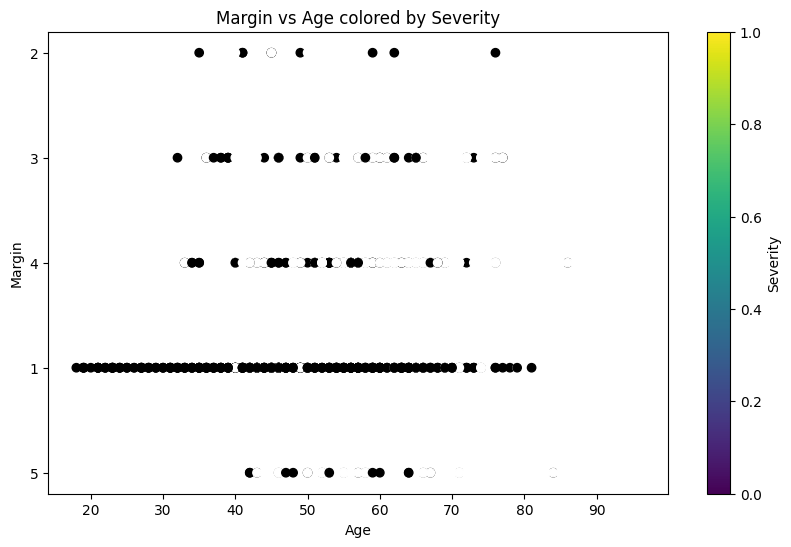

<ipython-input-11-a8527c79e138>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data['Age'], data['Shape'], c=data['Severity'], cmap='viridis')


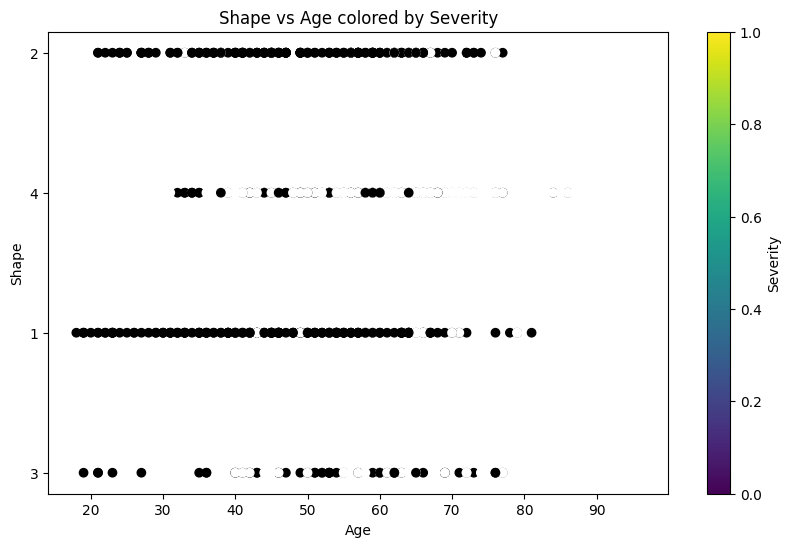

In [ ]:
# Plot for Density vs Age
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Density'], c=data['Severity'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density vs Age colored by Severity')
plt.colorbar(label='Severity')
plt.show()

# Plot for Margin vs Age
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Margin'], c=data['Severity'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Margin')
plt.title('Margin vs Age colored by Severity')
plt.colorbar(label='Severity')
plt.show()

# Plot for Shape vs Age
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Shape'], c=data['Severity'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Shape')
plt.title('Shape vs Age colored by Severity')
plt.colorbar(label='Severity')
plt.show()

In [ ]:
import plotly.graph_objects as go

# Assuming 'data' is your DataFrame and it's already loaded
# Ensure 'BIRADS', 'Shape', 'Density', and 'Severity' columns are properly cleaned and formatted

# Convert columns to appropriate data types if necessary
data['BIRADS'] = pd.to_numeric(data['BIRADS'], errors='coerce')
data['Shape'] = pd.to_numeric(data['Shape'], errors='coerce')
data['Density'] = pd.to_numeric(data['Density'], errors='coerce')
data['Severity'] = pd.to_numeric(data['Severity'], errors='coerce')

# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=data['BIRADS'],
    y=data['Shape'],
    z=data['Density'],
    mode='markers',
    marker=dict(
        size=6,
        color=data['Severity'],
        colorscale='viridis',  # You can choose a different colorscale if you prefer
        opacity=0.8
    )
)])

# Set labels and title
fig.update_layout(scene=dict(
    xaxis_title='BIRADS',
    yaxis_title='Shape',
    zaxis_title='Density',
    ),
    title='3D Scatter Plot of BIRADS, Shape, and Density colored by Severity'
)

fig.show()


In [ ]:
# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=data['Age'],
    y=data['Shape'],
    z=data['Density'],
    mode='markers',
    marker=dict(
        size=6,
        color=data['Severity'] + 1,
        colorscale='viridis',  # You can choose a different colorscale if you prefer
        opacity=0.8
    )
)])

# Set labels and title
fig.update_layout(scene=dict(
    xaxis_title='Age',
    yaxis_title='Shape',
    zaxis_title='Density',
    ),
    title='3D Scatter Plot of Age (factor), Shape, and Density colored by Severity'
)

fig.show()

In [ ]:
# Create a 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=data['BIRADS'],
    y=data['Shape'],
    z=data['Age'],
    mode='markers',
    marker=dict(
        size=6,
        color=data['Severity'] + 1,
        colorscale='viridis',  # You can choose a different colorscale if you prefer
        opacity=0.8
    )
)])

# Set labels and title
fig.update_layout(scene=dict(
    xaxis_title='BIRADS',
    yaxis_title='Shape',
    zaxis_title='Age',
    ),
    title='3D Scatter Plot of BIRADS, Shape, and Age (factor) colored by Severity'
)

fig.show()

In [ ]:
# Copying the dataframe
data1 = data.copy()

# Creating dummy variables for 'Shape' column in data1 dataframe
unique_shapes = data1['Shape'].unique()
for unique_value in unique_shapes:
    data1[f"shape_{unique_value}"] = (data1['Shape'] == unique_value).astype(int)

# Creating dummy variables for 'Margin' column in data1 dataframe
unique_margins = data1['Margin'].unique()
for unique_value in unique_margins:
    data1[f"margin_{unique_value}"] = (data1['Margin'] == unique_value).astype(int)


In [ ]:
print(data.head(20))

    BIRADS  Age  Shape Margin  Density  Severity
0        5   67      3      5        3         1
1        4   43      1      1        3         1
2        5   58      4      5        3         1
3        4   28      1      1        3         0
4        5   74      1      5        3         1
5        4   65      1      1        3         0
6        4   70      4      1        3         0
7        5   42      1      1        3         0
8        5   57      1      5        3         1
9        5   60      4      5        1         1
10       5   76      1      4        3         1
11       3   42      2      1        3         1
12       4   64      1      1        3         0
13       4   36      3      1        2         0
14       4   60      2      1        2         0
15       4   54      1      1        3         0
16       3   52      3      4        3         0
17       4   59      2      1        3         1
18       4   54      1      1        3         1
19       4   40     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Splitting the data into training and testing sets
X = data[['BIRADS', 'Shape', 'Density']]
y = data['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and fitting the k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

# Making predictions on the test data
y_pred_knn = knn.predict(X_test)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print(conf_matrix)


[[124  33]
 [ 30 102]]


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming 'data' is your DataFrame and it contains features and target variable 'Severity'

# Splitting the data into features (X) and target variable (y)
X = data.drop(columns=['Severity'])  # Features
y = data['Severity']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and fitting the SVM classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Getting predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.79      0.80       157
           1       0.76      0.77      0.76       132

    accuracy                           0.78       289
   macro avg       0.78      0.78      0.78       289
weighted avg       0.78      0.78      0.78       289



In [ ]:
from sklearn.svm import SVC
import time

# Assuming 'svm_modal' is your SVM model trained previously and 'x' is your test data

# Start timing
start_time = time.time()

# Predict using the SVM model
pred = svm_model.predict(X)

# End timing
end_time = time.time()

# Calculate execution time
execution_time = end_time - start_time

# Print execution time
print("Execution time:", execution_time)


Execution time: 0.022395849227905273


In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(pred, y)

# Print the contingency table
print(contingency_table)

Severity    0    1
row_0             
0         399   94
1         117  351


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

# Multi-layer Perceptron (MLP)
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
print("Multi-layer Perceptron (MLP):")
print(classification_report(y_test, y_pred_mlp))

# Decision Tree (DT)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree (DT):")
print(classification_report(y_test, y_pred_dt))

# Random Forest (RF)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest (RF):")
print(classification_report(y_test, y_pred_rf))

# Naive Bayes (NB)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes (NB):")
print(classification_report(y_test, y_pred_nb))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       157
           1       0.84      0.85      0.84       132

    accuracy                           0.85       289
   macro avg       0.85      0.85      0.85       289
weighted avg       0.85      0.85      0.85       289

Multi-layer Perceptron (MLP):
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       157
           1       0.76      0.86      0.80       132

    accuracy                           0.81       289
   macro avg       0.81      0.81      0.81       289
weighted avg       0.82      0.81      0.81       289

Decision Tree (DT):
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       157
           1       0.74      0.65      0.69       132

    accuracy                           0.73       289
   macro avg       0.73      0.73      0.73       289
wei

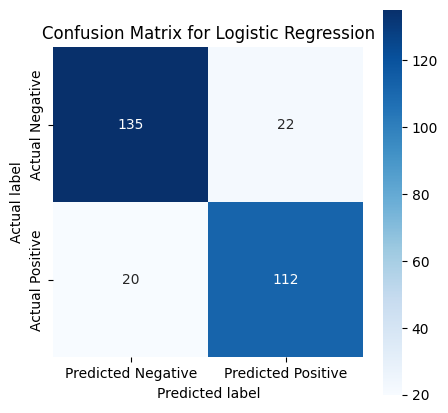

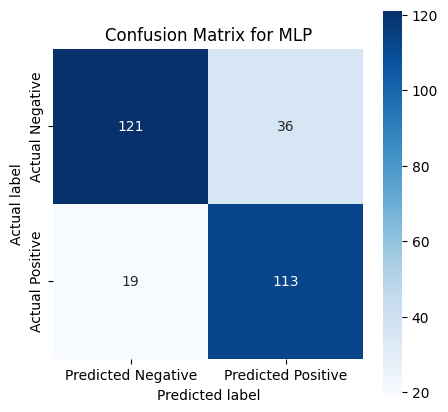

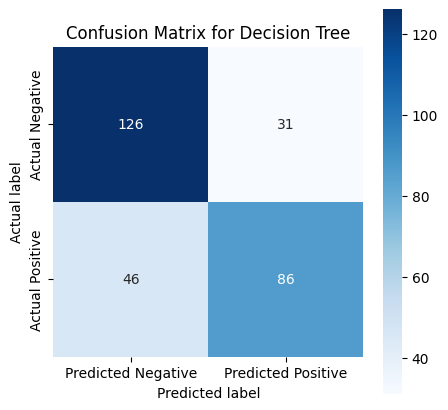

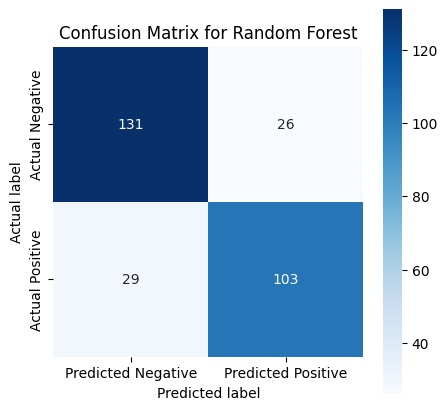

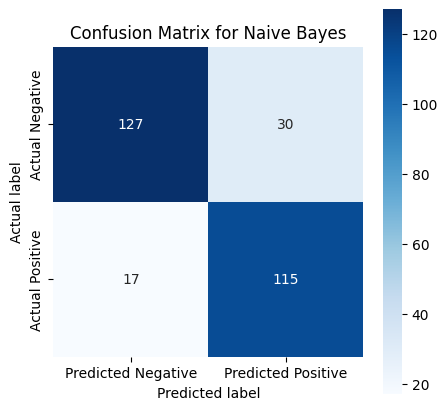

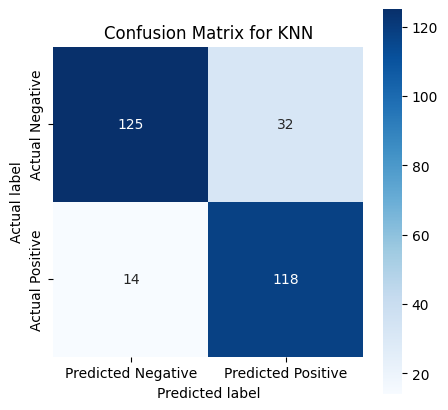

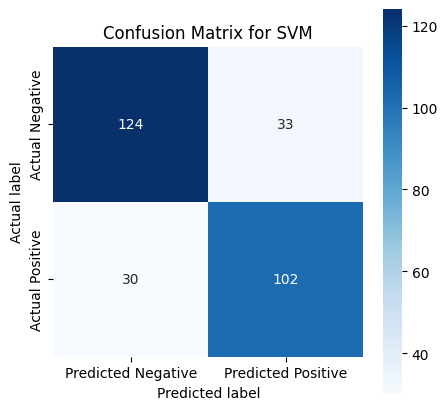

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of classifier names and their predictions
classifiers = ['Logistic Regression', 'MLP', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN', 'SVM']
predictions = [y_pred_logistic, y_pred_mlp, y_pred_dt, y_pred_rf, y_pred_nb, y_pred_knn, y_pred_svm]

# Calculate and plot confusion matrices for each classifier
for clf_name, y_pred in zip(classifiers, predictions):
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', square=True,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.show()


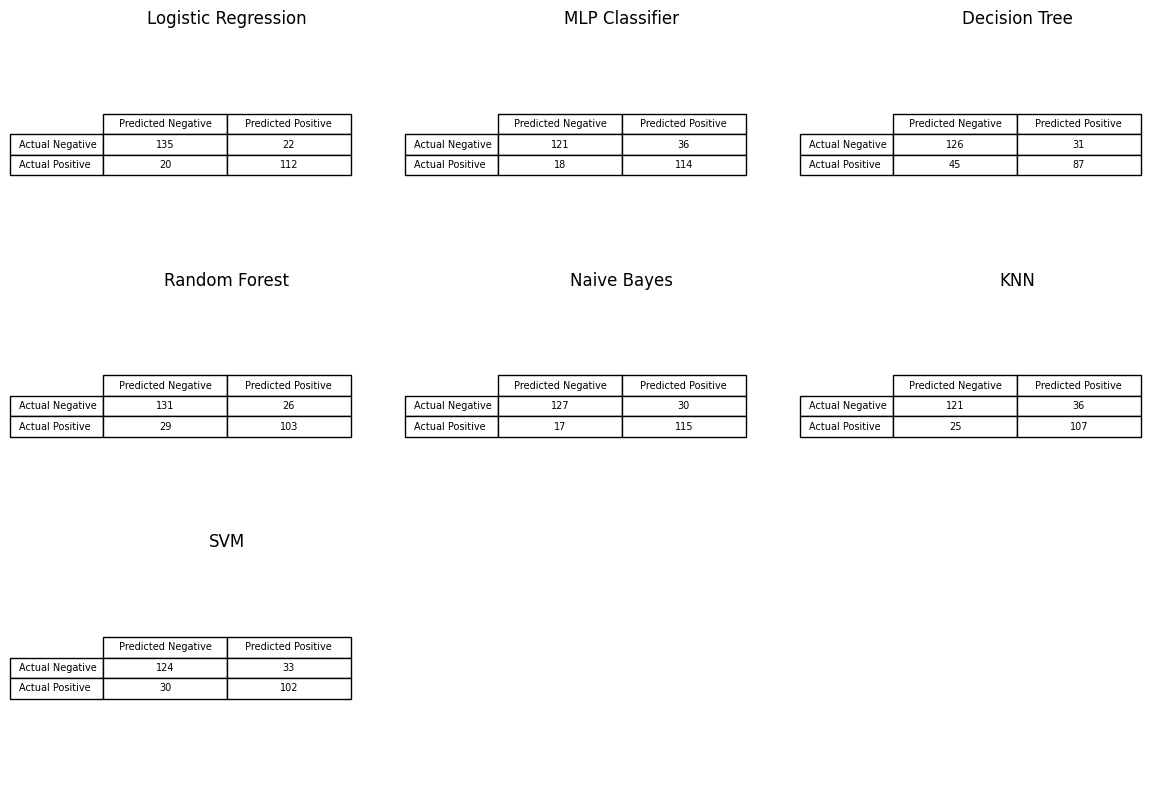

In [ ]:
import matplotlib.pyplot as plt

# Dictionary containing algorithm names as keys and their confusion matrices as values
confusion_matrices = {
    'Logistic Regression': [[135, 22], [20, 112]],
    'MLP Classifier': [[121, 36], [18, 114]],
    'Decision Tree': [[126, 31], [45, 87]],
    'Random Forest': [[131, 26], [29, 103]],
    'Naive Bayes': [[127, 30], [17, 115]],
    'KNN': [[121, 36], [25, 107]],
    'SVM': [[124, 33], [30, 102]]
}

# Plotting the tables as images
plt.figure(figsize=(12, 8))
for i, (algorithm, matrix) in enumerate(confusion_matrices.items(), start=1):
    plt.subplot(3, 3, i)
    plt.table(cellText=matrix, rowLabels=['Actual Negative', 'Actual Positive'], colLabels=['Predicted Negative', 'Predicted Positive'], loc='center', cellLoc='center')
    plt.title(algorithm, fontsize=12)
    plt.axis('off')  # Turn off axes
plt.tight_layout()
plt.show()


In [ ]:
# Function to calculate metrics from confusion matrix
def calculate_metrics(matrix):
    tp = matrix[0][0]
    fp = matrix[0][1]
    fn = matrix[1][0]
    tn = matrix[1][1]

    # Accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Sensitivity (Recall)
    sensitivity = tp / (tp + fn)

    # Specificity
    specificity = tn / (tn + fp)

    # Precision
    precision = tp / (tp + fp)

    # F1-score
    f1_score = (2 * precision * sensitivity) / (precision + sensitivity)

    # Negative Prediction Value
    neg_pred_value = tn / (tn + fn)

    # False Positive Rate
    false_pos_rate = fp / (fp + tn)

    # False Discovery Rate
    false_disc_rate = fp / (fp + tp)

    # False Negative Rate
    false_neg_rate = fn / (fn + tp)

    return accuracy, sensitivity, specificity, precision, f1_score, neg_pred_value, false_pos_rate, false_disc_rate, false_neg_rate

# Calculate metrics for each model
metrics = {}
for algorithm, matrix in confusion_matrices.items():
    metrics[algorithm] = calculate_metrics(matrix)

# Print metrics for each model
print("Model                  | Accuracy | Sensitivity | Specificity | Precision | F1-Score | Negative Pred. Value | False Pos. Rate | False Disc. Rate | False Neg. Rate")
print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------")
for algorithm, (accuracy, sensitivity, specificity, precision, f1_score, neg_pred_value, false_pos_rate, false_disc_rate, false_neg_rate) in metrics.items():
    print(f"{algorithm.ljust(22)}| {accuracy:.2f}     | {sensitivity:.2f}         | {specificity:.2f}        | {precision:.2f}      | {f1_score:.2f}     | {neg_pred_value:.2f}                 | {false_pos_rate:.2f}            | {false_disc_rate:.2f}             | {false_neg_rate:.2f}")


Model                  | Accuracy | Sensitivity | Specificity | Precision | F1-Score | Negative Pred. Value | False Pos. Rate | False Disc. Rate | False Neg. Rate
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
Logistic Regression   | 0.85     | 0.87         | 0.84        | 0.86      | 0.87     | 0.85                 | 0.16            | 0.14             | 0.13
MLP Classifier        | 0.81     | 0.87         | 0.76        | 0.77      | 0.82     | 0.86                 | 0.24            | 0.23             | 0.13
Decision Tree         | 0.74     | 0.74         | 0.74        | 0.80      | 0.77     | 0.66                 | 0.26            | 0.20             | 0.26
Random Forest         | 0.81     | 0.82         | 0.80        | 0.83      | 0.83     | 0.78                 | 0.20            | 0.17             | 0.18
Naive Bayes           | 0.84     | 0.88         | 0.79        | 0

In [ ]:
# Dictionary containing algorithm names as keys and their confusion matrices as values
confusion_matrices = {
    'LogisticRegression': [[135, 22], [20, 112]],
    'MLP Classifier': [[121, 36], [18, 114]],
    'Decision Tree': [[126, 31], [45, 87]],
    'Random Forest': [[131, 26], [29, 103]],
    'Naive Bayes': [[127, 30], [17, 115]],
    'KNN': [[121, 36], [25, 107]],
    'SVM': [[124, 33], [30, 102]]
}

# Function to calculate accuracy from confusion matrix
def calculate_accuracy(matrix):
    correct_predictions = matrix[0][0] + matrix[1][1]  # Sum of diagonal elements
    total_predictions = sum(sum(row) for row in matrix)  # Total number of predictions
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

# Calculate accuracy for each model
accuracies = {}
for algorithm, matrix in confusion_matrices.items():
    accuracies[algorithm] = calculate_accuracy(matrix)

# Find the best model (highest accuracy)
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

# Display accuracies and the best model
print(" Model              | Accuracy (%)")

print("|---------------------------------|")
for algorithm, accuracy in accuracies.items():
    print(f" {algorithm.ljust(18)} | {accuracy:.2f}%")
    print("|---------------------------------|")

print(f"Best Model to Deploy: {best_model} (Accuracy: {best_accuracy:.2f}%)")


 Model              | Accuracy (%)
|---------------------------------|
 LogisticRegression | 85.47%
|---------------------------------|
 MLP Classifier     | 81.31%
|---------------------------------|
 Decision Tree      | 73.70%
|---------------------------------|
 Random Forest      | 80.97%
|---------------------------------|
 Naive Bayes        | 83.74%
|---------------------------------|
 KNN                | 78.89%
|---------------------------------|
 SVM                | 78.20%
|---------------------------------|
Best Model to Deploy: LogisticRegression (Accuracy: 85.47%)
